In [ ]:
#This code is used as a webscraper to fetch dataset of user's order history.

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from bs4 import BeautifulSoup
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import csv
import io
from PIL import Image

In [ ]:
driver = webdriver.Chrome()
driver.get("https://www.flipkart.com/account/login?ret=%2Faccount%2Forders%3Flink%3Dhome_orders&fromMyOrdersPage=true")

In [ ]:
email = WebDriverWait(driver,5).until(EC.element_to_be_clickable((By.XPATH,"/html/body/div/div/div[3]/div/div[2]/div/form/div[1]/input")))
email.clear()
email.send_keys("9304106185")


In [ ]:
otp = WebDriverWait(driver,5).until(EC.element_to_be_clickable((By.XPATH,"/html/body/div/div/div[3]/div/div[2]/div/form/div[3]/button")))
otp.click()

In [ ]:
otp1 = int(input("Enter otp: "))

In [ ]:
nums=[]

In [ ]:
while(otp1>0):
    rem=otp1%10
    nums.append(rem)
    otp1=otp1//10

In [ ]:
for i in range(0, len(nums)):
    xpath = "/html/body/div/div/div[3]/div/div[2]/div/div/form/div/div[{}]/input".format(i + 1)
    firstdig = WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.XPATH, xpath)))
    firstdig.clear()
    firstdig.send_keys(nums[len(nums)-i-1])


In [ ]:
Product_image = []
soup2=BeautifulSoup(driver.page_source, 'lxml')
def parse_image_urls(classes, location, source):
    for a in soup2.findAll(attrs={"class": classes}):
        name = a.find(location)
        if name not in Product_image:
            Product_image.append(name.get(source))


parse_image_urls("CXW8mj", "img", "src")

In [ ]:
Product_image

['https://rukminim2.flixcart.com/image/xif0q/shirt/b/d/f/3xl-13-lstr-wine-vtexx-original-imagnzbummhkgr7p.jpeg',
 'https://rukminim2.flixcart.com/image/xif0q/shirt/u/d/r/xl-c301-b-green-dennis-lingo-original-imag42z8fxqvxgzu-bb.jpeg',
 'https://rukminim2.flixcart.com/image/xif0q/shirt/u/d/r/xl-c301-b-green-dennis-lingo-original-imag42z8fxqvxgzu-bb.jpeg',
 'https://rukminim2.flixcart.com/image/xif0q/shirt/x/j/x/l-c301-darkred-dennis-lingo-original-imag42pwzynahcxx-bb.jpeg',
 'https://rukminim2.flixcart.com/image/k7531jk0/shirt/7/w/8/l-c756-white-dennis-lingo-original-imafpg7fwcupnffb.jpeg',
 'https://rukminim2.flixcart.com/image/l4ei1e80/headphone/b/j/w/bullets-wireless-z2-oneplus-original-imagfaww7ga6nshz.jpeg',
 'https://rukminim2.flixcart.com/image/ksw4ccw0/headphone/w/g/r/rockerz-450-boat-original-imag6cqqh49wjfy5.jpeg']

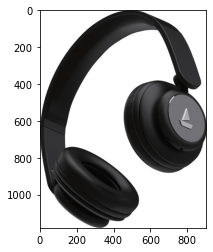

In [ ]:
from pathlib import Path
# hashlib allows you to get hashes. Let's use 'sha1' to name the images.
import hashlib
# Set a file_path variable that points to your directory.
# Create a file based on the sha1 hash of 'image_content'.
# Use .hexdigest to convert it into a string.
# file_path = Path("/content/", hashlib.sha1(image_content).hexdigest()[:10] + ".png")
# image.save(file_path, "PNG", quality=80)

for c in Product_image:
        image_content = requests.get(c).content
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert("RGB")
        plt.imshow(image)
        file_path = Path("C:/Users/akash/Documents/purimages", hashlib.sha1(image_content).hexdigest()[:10] + ".png")
        image.save(file_path, "PNG", quality=80)

In [ ]:
Product_image = []
Product_name = []
color = []


soup2=BeautifulSoup(driver.page_source, 'lxml')
names = soup2.find_all("div",class_ = "_1hVBfR")
for i in names:
  name = i.text
  Product_name.append(name)
print(Product_name)

['VTEXX Men Solid Formal Maroon ShirtColor: MaroonSize: S', 'Dennis Lingo Men Solid Casual Green Shir...Color: GreenSize: S', 'Dennis Lingo Men Solid Casual Green Shir...Color: GreenSize: S', 'Dennis Lingo Men Solid Casual Maroon Shi...Color: MaroonSize: S', 'Dennis Lingo Men Checkered Casual White ...Color: WhiteSize: S', 'OnePlus Bullets Wireless Z2 Bluetooth He...Color: Black,Red', 'boAt Rockerz 450 Bluetooth HeadsetColor: Black']


In [ ]:
Brand_name = []
Color = []

for string in Product_name:
    Brand_name.append(string.split("Color:")[0])
    Color.append(string.split("Color:")[1].split(":")[0])

In [ ]:
Brand_name

['VTEXX Men Solid Formal Maroon Shirt',
 'Dennis Lingo Men Solid Casual Green Shir...',
 'Dennis Lingo Men Solid Casual Green Shir...',
 'Dennis Lingo Men Solid Casual Maroon Shi...',
 'Dennis Lingo Men Checkered Casual White ...',
 'OnePlus Bullets Wireless Z2 Bluetooth He...',
 'boAt Rockerz 450 Bluetooth Headset']

In [ ]:
Color

[' MaroonSize',
 ' GreenSize',
 ' GreenSize',
 ' MaroonSize',
 ' WhiteSize',
 ' Black,Red',
 ' Black']

In [ ]:
# Brand = []

# for stri in Brand_name:
#     Brand.append(stri.split(","))
